导入 src 路径

In [1]:
import sys
import os

# 将 src 目录添加到 sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))
if project_root not in sys.path:
    sys.path.append(project_root)
print("Added to sys.path:", project_root)


Added to sys.path: F:\study\python\projects\agent_example\src


第三步：测试客户端调用

In [1]:
from agent_example.client.client import FileBasedQAClient

# 测试 gRPC 服务
client = FileBasedQAClient()
question = "请问里面出现了几种水果。使用柱状图给出"
file_content = """apple,apple,apple,apple,apple,apple,banana,banana,banana,orange"""

# 写入测试文件
test_file_path = "test.txt"
with open(test_file_path, "w") as f:
    f.write(file_content)

# 调用服务端
server_address = "localhost:50051"
res = client.query_file(question, test_file_path)

In [33]:
print(res["text_answer"])

文档中出现了三种水果，分别是苹果、香蕉和橙子。苹果出现了7次，香蕉出现了3次，橙子出现了1次。


绘制图像

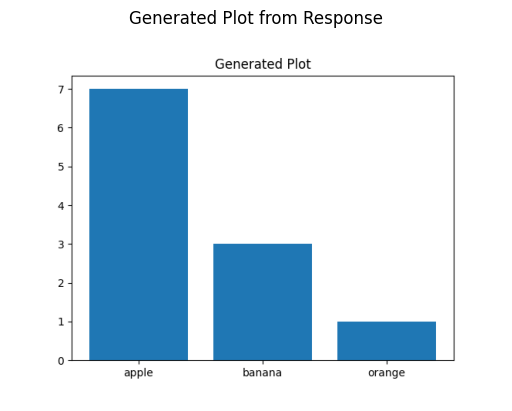

In [32]:
import io
from PIL import Image
import matplotlib.pyplot as plt

image_data = res["image_data"]
# 将图像数据转化为字节流
image_stream = io.BytesIO(image_data)

# 打开并显示图像
try:
    image = Image.open(image_stream)
    plt.imshow(image)
    plt.axis('off')  # 关闭坐标轴
    plt.title("Generated Plot from Response")
    plt.show()
except Exception as e:
    print("Error displaying the image:", e)
